# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [214]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [215]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [216]:
# 1. Get the total number of rides per area
total_rides_by_area = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_by_area

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [217]:
# 2. Get the total drivers for each area type
total_drivers_by_area = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers_by_area

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [218]:
# 3. Get the total amount of fares by area
total_fares_by_area = pyber_data_df.groupby(['type']).sum()['fare']
total_fares_by_area

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [219]:
# 4. Get the avg fare per ride per area
avg_fare_per_ride = pyber_data_df.groupby(['type']).mean()['fare']
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [220]:
# 5. Get the average fare per driver per area
avg_fare_per_driver = pyber_data_df.groupby(['type']).sum()['fare'] / total_drivers_by_area

avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [221]:

#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides" : total_rides_by_area,
    "Total Drivers" : total_drivers_by_area,
    "Total Fares" : total_fares_by_area,
    "Avg Fare per Ride" : avg_fare_per_ride, 
    "Avg Fare per Driver" : avg_fare_per_driver,
})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [222]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [223]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Avg Fare per Ride'] = pyber_summary_df['Avg Fare per Ride'].map("${:,.2f}".format)
pyber_summary_df['Avg Fare per Driver'] = pyber_summary_df['Avg Fare per Driver'].map("${:,.2f}".format)


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [224]:
#. Read the merged DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [225]:
# 9. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_df = pyber_data_df.groupby(['type', 'date']).sum()['fare']
sum_fares_df

type   date         
Rural  1/1/19 9:45      43.69
       1/11/19 4:39     16.42
       1/14/19 15:58    54.10
       1/14/19 7:09     18.05
       1/15/19 21:44    30.26
                        ...  
Urban  5/8/19 1:54      32.69
       5/8/19 2:31      41.33
       5/8/19 4:20      21.99
       5/8/19 4:39      18.45
       5/8/19 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [226]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fares_df = sum_fares_df.reset_index()
sum_fares_df

,type,date,fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26
...,...,...,...
2359,Urban,5/8/19 1:54,32.69
2360,Urban,5/8/19 2:31,41.33
2361,Urban,5/8/19 4:20,21.99
2362,Urban,5/8/19 4:39,18.45


In [256]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fares_df_pivot = sum_fares_df.pivot(index = 'date', columns = 'type', values='fare')
sum_fares_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [250]:
sum_fares_df

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-11 04:39:00,16.42
2,Rural,2019-01-14 15:58:00,54.10
3,Rural,2019-01-14 07:09:00,18.05
4,Rural,2019-01-15 21:44:00,30.26
...,...,...,...
2359,Urban,2019-05-08 01:54:00,32.69
2360,Urban,2019-05-08 02:31:00,41.33
2361,Urban,2019-05-08 04:20:00,21.99
2362,Urban,2019-05-08 04:39:00,18.45


In [257]:
sum_fares_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [259]:
sum_fares_df_pivot.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [260]:
sum_fares_df['date'] = pd.to_datetime(sum_fares_df['date'])

In [252]:
sum_fares_df.dtypes

type            object
date    datetime64[ns]
fare           float64
dtype: object

In [266]:
sum_fares_df_pivot.index = pd.to_datetime(sum_fares_df_pivot.index)

In [273]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
first_third_of_year_df = sum_fares_df_pivot.loc[(sum_fares_df_pivot.index >= "2019-01-01")
                                         & (sum_fares_df_pivot.index <= "2019-04-29")]

first_third_of_year_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [274]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
first_third_of_year_df.index = pd.to_datetime(first_third_of_year_df.index)

In [275]:
first_third_of_year_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [276]:
# 14. Check that the datatype for the index is datetime using df.info()
first_third_of_year_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


# Create the bins to use in the resample function. These bins will be weeks.

In [277]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
first_third_of_year_df = first_third_of_year_df.resample('W').sum()
first_third_of_year_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


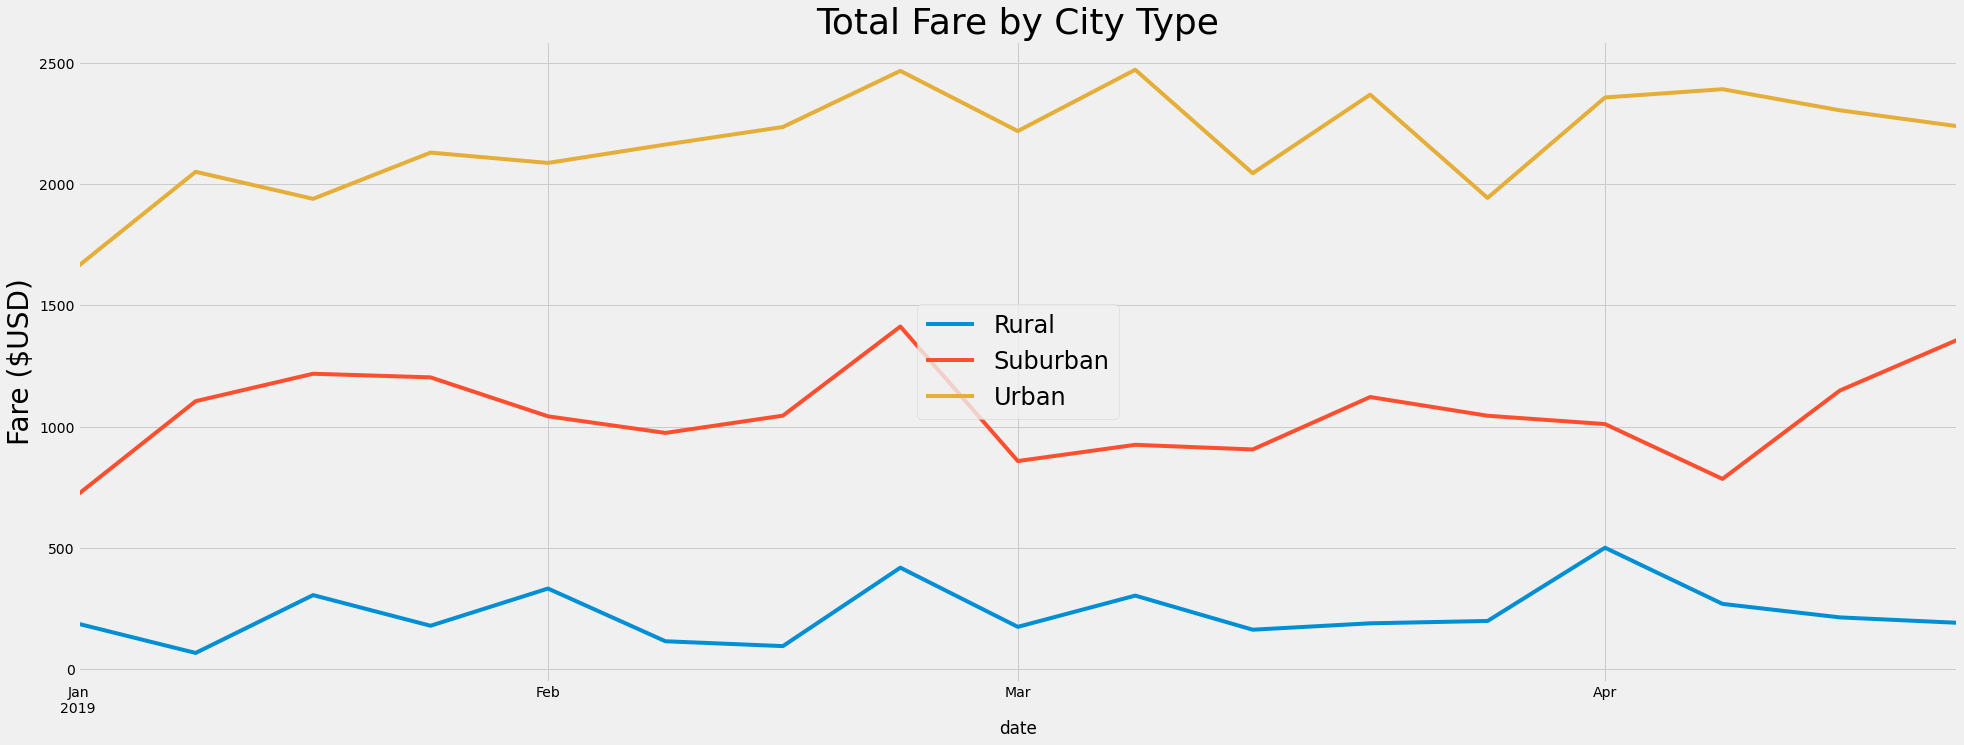

In [314]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = plt.gca()
first_third_of_year_df.plot(figsize = (30, 11), ax=ax)
ax.set_title('Total Fare by City Type', fontsize=36)
ax.set_ylabel("Fare ($USD)", fontsize=28)
ax.legend(loc='center', fontsize=24)
